In [1]:
import sys
import os
import pandas as pd
from pprint import pprint

# Import your custom modules. Adjust the module paths as needed.
from data.load_data import loadTrainingData
from plots.feature_plots import plot_missingness


In [2]:
# Define directories and max_files manually.
directories = ['../../training_setA/', '../../training_setB/']
max_files = None  # Change this to a number (e.g., 1000) if you want to limit the number of files
ignore_columns = ['Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime']

dfs = []
patient_dict = {}

for directory in directories:
    # Build the path pattern for .psv files in the directory.
    pattern = os.path.join(directory, "*.psv")
    print(f"\nLoading data from: {pattern} with max_files={max_files}")
    patient_data = loadTrainingData(pattern, max_files)
    
    patient_dict.update(patient_data)
    
    # Concatenate all DataFrames from the current directory.
    combined_df = pd.concat(list(patient_data.values()), ignore_index=True)
    dfs.append(combined_df)

# Concatenate the combined DataFrames from all directories.
all_data = pd.concat(dfs, ignore_index=True)
print(f"\nCombined training set shape: {all_data.shape}")



Loading data from: ../../training_setA/*.psv with max_files=None


Loading PSV Files: 100%|█████████████████| 20336/20336 [00:21<00:00, 960.91it/s]



Loading data from: ../../training_setB/*.psv with max_files=None


Loading PSV Files: 100%|█████████████████| 20000/20000 [00:20<00:00, 987.65it/s]



Combined training set shape: (1552210, 35)


Average missingness: 77.84%


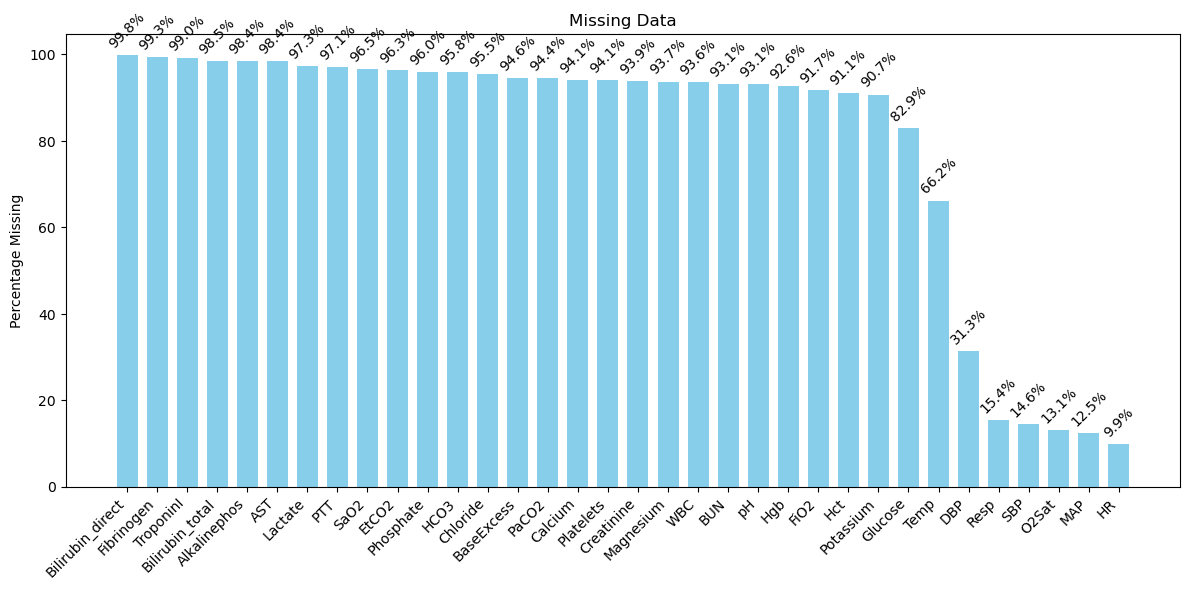

In [3]:
plot_missingness(all_data, title="Missing Data")

In [4]:
all_data.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
0,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,...,3.7,NaN,NaN,27.9,8.8,38.1,9.9,223.0,160.0,0
1,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,...,NaN,NaN,NaN,27.9,8.8,NaN,9.9,NaN,NaN,0
2,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,...,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
all_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'SepsisLabel'],
      dtype='object')

Average missingness: 77.82%


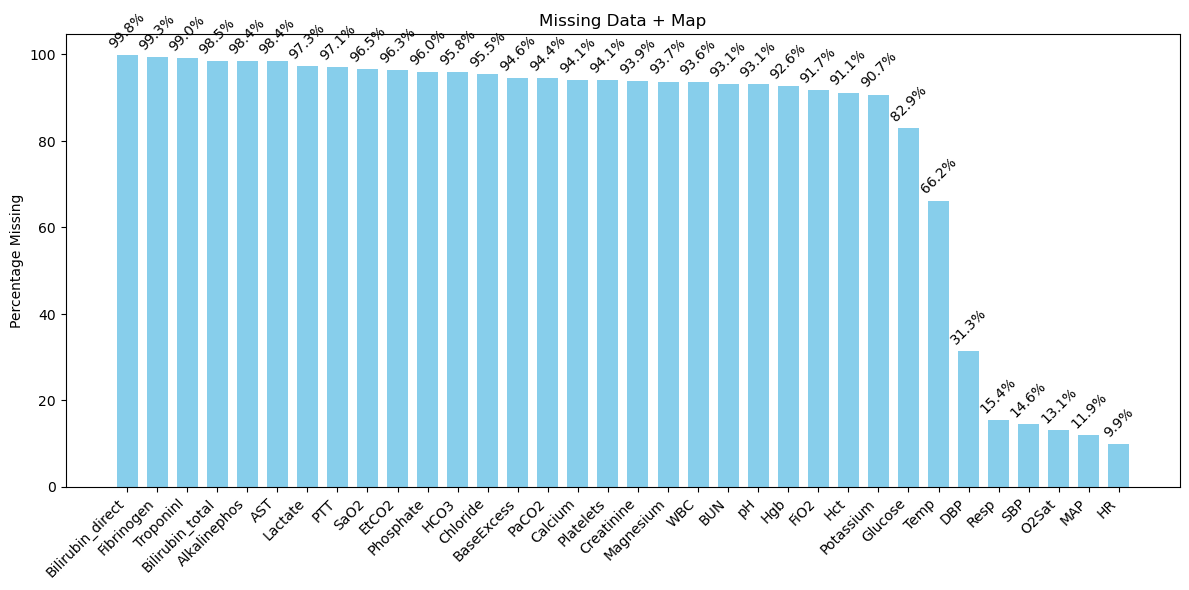

In [6]:
# Improve Missingness here
from data.clean_data import forwardFillMAP

all_data = forwardFillMAP(all_data)
plot_missingness(all_data, title="Missing Data + Map")

Average missingness: 77.35%


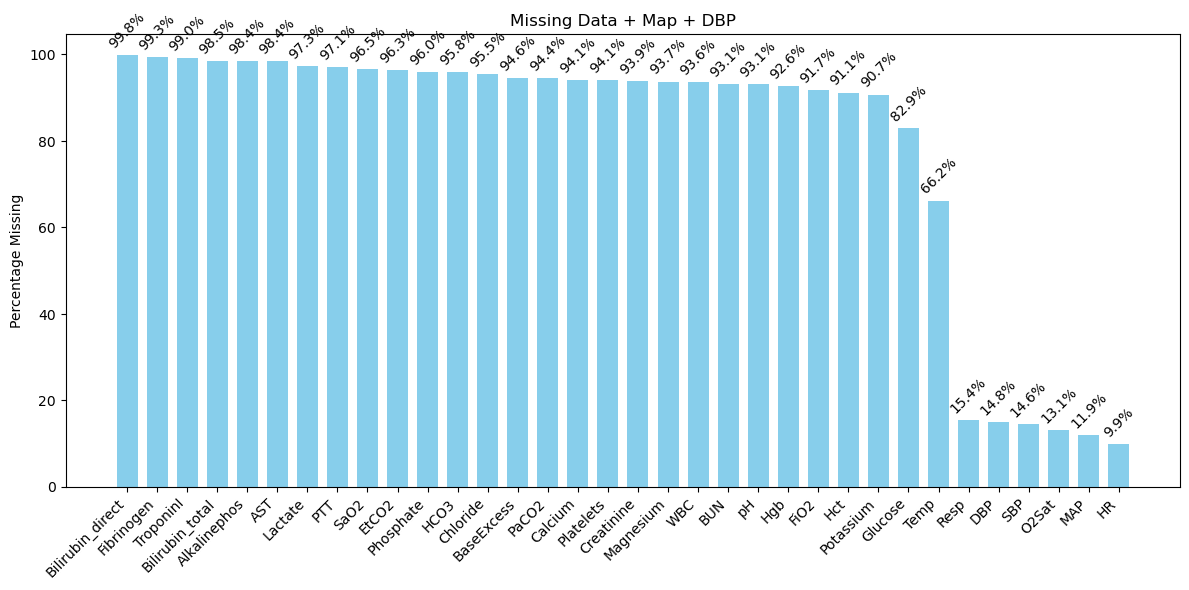

In [7]:
from data.clean_data import forwardFillDBP

all_data = forwardFillDBP(all_data)
plot_missingness(all_data, title="Missing Data + Map + DBP")

Average missingness: 77.35%


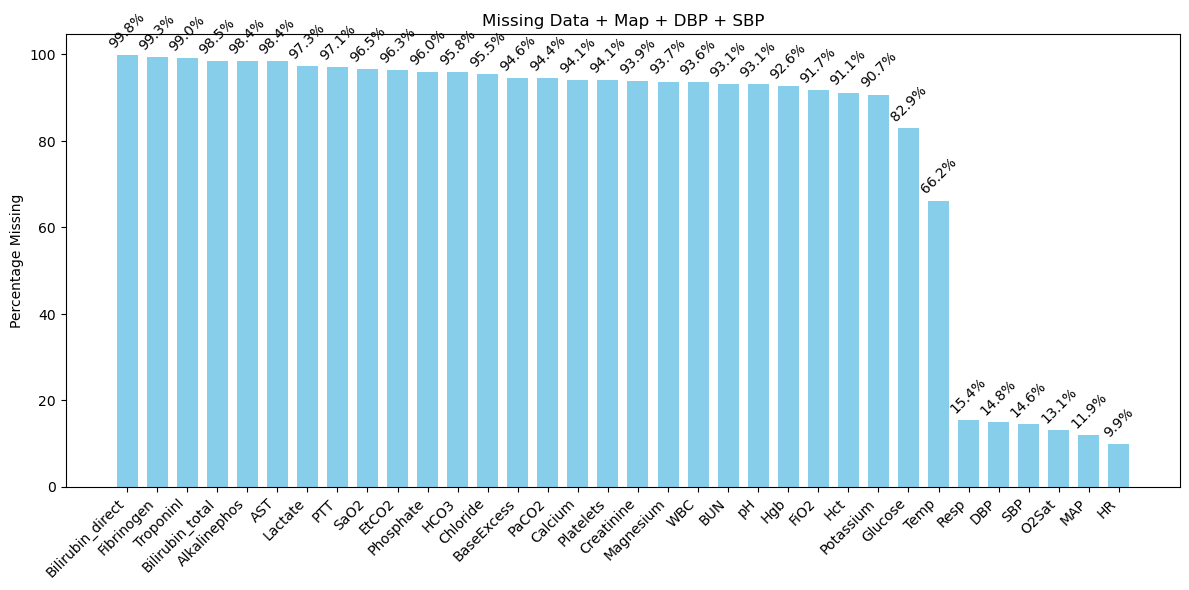

In [8]:
from data.clean_data import forwardFillSBP

all_data = forwardFillSBP(all_data)
plot_missingness(all_data, title="Missing Data + Map + DBP + SBP")

Correlation Matrix for pH, PaCO2, and HCO3:
             pH     PaCO2      HCO3
pH     1.000000 -0.426536  0.426036
PaCO2 -0.426536  1.000000  0.540772
HCO3   0.426036  0.540772  1.000000


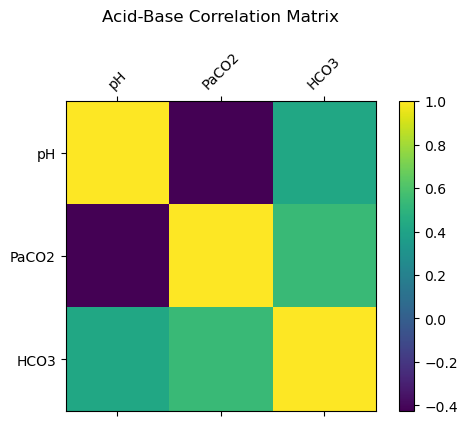

In [9]:
import matplotlib.pyplot as plt
    
df = all_data.copy()

complete = df[['pH', 'PaCO2', 'HCO3']].dropna()
corr_matrix = complete.corr()
print("Correlation Matrix for pH, PaCO2, and HCO3:")
print(corr_matrix)

# Optionally, visualize the correlation matrix.
plt.figure(figsize=(6, 4))
plt.matshow(corr_matrix, fignum=1)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.colorbar()
plt.title("Acid-Base Correlation Matrix", pad=20)
plt.show()


In [10]:
from data.correlation_data import test_pH_equation_accuracy

test_pH_equation_accuracy(df)

Descriptive statistics for True pH values:
count    17803.000000
mean         7.378663
std          0.077137
min          6.620000
25%          7.340000
50%          7.390000
75%          7.430000
max          7.680000
Name: True pH, dtype: float64

Descriptive statistics for Predicted pH values:
count    17803.000000
mean         7.376322
std          0.082952
min          6.670940
25%          7.331833
50%          7.383118
75%          7.429242
max          7.680871
Name: Predicted pH, dtype: float64

Descriptive statistics for Absolute Error:
count    17803.000000
mean         0.025713
std          0.024045
min          0.000033
25%          0.009544
50%          0.019668
75%          0.035086
max          0.459051
Name: Absolute Error, dtype: float64

Mean Absolute Error of pH prediction: 0.026


0.02571267025478573

Average missingness: 77.21%


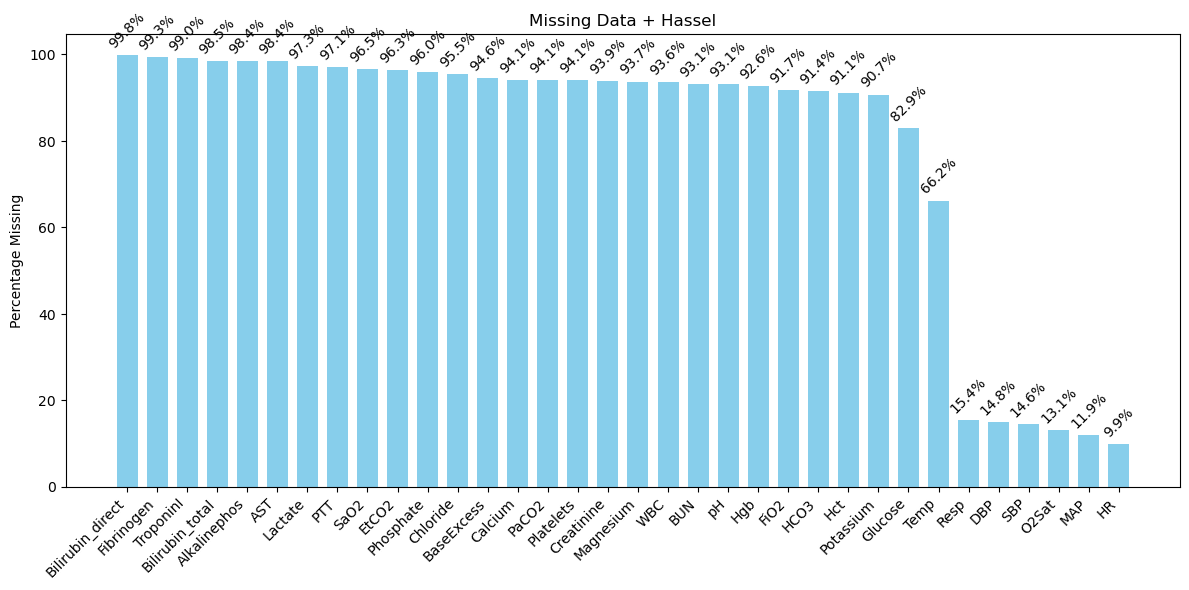

In [11]:
from data.clean_data import forwardFillHasselbalch

all_data = forwardFillHasselbalch(all_data)
plot_missingness(all_data, title="Missing Data + Hassel")

In [12]:
all_data['Bilirubin_total'].describe()

count    23141.000000
mean         2.114059
std          4.311468
min          0.100000
25%          0.500000
50%          0.900000
75%          1.700000
max         49.600000
Name: Bilirubin_total, dtype: float64

In [13]:
all_data['Bilirubin_direct'].describe()

count    2990.000000
mean        1.836177
std         3.694082
min         0.010000
25%         0.200000
50%         0.445000
75%         1.700000
max        37.500000
Name: Bilirubin_direct, dtype: float64

In [14]:
from data.clean_data import forwardFillData

clean_df = forwardFillData(all_data)
# plot_missingness(clean_df, title="Cleaned Data")

In [15]:
from data.clean_data import backShiftSepsisLabel


patient_record = None
for df in patient_dict.values():
    if df['SepsisLabel'].sum() > 0:
        patient_record = df
        break


patient_record.tail(10)


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
44,112,100.0,NaN,138,90,69,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
45,111,97.0,NaN,140,91,69,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
46,112,95.0,NaN,129,86,65,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
47,109,100.0,NaN,127,84,62,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.1,9.1,32.4,8.8,NaN,106.0,1
48,99,96.0,36.61,140,95,71,28.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.1,9.1,NaN,8.8,NaN,NaN,1
49,112,97.0,NaN,134,90,67,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
50,105,100.0,NaN,142,96,72,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
51,117,95.0,NaN,126,83,62,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
52,114,94.0,36.83,144,96,71,26.0,NaN,0.0,23.0,...,3.9,NaN,NaN,26.1,8.8,NaN,9.9,NaN,103.0,1
53,113,87.0,NaN,117,77,59,30.0,NaN,0.0,23.0,...,3.9,NaN,NaN,26.1,8.8,NaN,9.9,NaN,NaN,1


In [16]:
shifted_patient_record = backShiftSepsisLabel(patient_record)

shifted_patient_record.tail(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel
44,112,100.0,NaN,138,90,69,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
45,111,97.0,NaN,140,91,69,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
46,112,95.0,NaN,129,86,65,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
47,109,100.0,NaN,127,84,62,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.1,9.1,32.4,8.8,NaN,106.0,0.0
48,99,96.0,36.61,140,95,71,28.0,NaN,NaN,NaN,...,NaN,NaN,NaN,27.1,9.1,NaN,8.8,NaN,NaN,0.0
49,112,97.0,NaN,134,90,67,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
50,105,100.0,NaN,142,96,72,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
51,117,95.0,NaN,126,83,62,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
52,114,94.0,36.83,144,96,71,26.0,NaN,0.0,23.0,...,3.9,NaN,NaN,26.1,8.8,NaN,9.9,NaN,103.0,1.0
53,113,87.0,NaN,117,77,59,30.0,NaN,0.0,23.0,...,3.9,NaN,NaN,26.1,8.8,NaN,9.9,NaN,NaN,1.0


In [17]:
# Count avg num of sepsis labels for a septic patient
# Take a dictionary of patient dataframes
# If they have at least one septic label
# Add the column to a list to calculate the avg number of rows for a septic patient and the avg number of septic labels = 1 for a patient
# also record the min and max number of septic label = 1 for a patient that has sepsis

In [18]:
from data.helper_data import count_sepsis_labels

count_sepsis_labels(patient_dict)

Average number of rows for septic patients: 58.80
Average number of septic labels (1's) per septic patient: 9.52
Minimum number of septic labels: 1 (Patient ID: 118632)
Maximum number of septic labels: 10 (Patient ID: 018630)


In [19]:
from models.mice.encode_data import encode_dict_deltas

encoded_patient_dict = encode_dict_deltas(patient_dict)

Encoding patients: 100%|██████████████████| 40336/40336 [09:43<00:00, 69.13it/s]


In [20]:
"""
Function takes a dict of patient dataframes
Create Sliding Window feature vectors or some many of feature vectors
Add Engineered features

RunLGBM

Eval outputs

Grid Search - Machine Learning library to run 10k combos with json input

"""

'\nFunction takes a dict of patient dataframes\nCreate Sliding Window feature vectors or some many of feature vectors\nAdd Engineered features\n\nRunLGBM\n\nEval outputs\n\nGrid Search - Machine Learning library to run 10k combos with json input\n\n'

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

patient_record = None
for df in encoded_patient_dict.values():
    if df['SepsisLabel'].sum() > 0:
        patient_record = df
        break
        
patient_record.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel,patient_id,SepsisLabel_delta,HR_delta1,HR_delta2,O2Sat_delta1,O2Sat_delta2,Temp_delta1,Temp_delta2,SBP_delta1,SBP_delta2,MAP_delta1,MAP_delta2,DBP_delta1,DBP_delta2,Resp_delta1,Resp_delta2,EtCO2_delta1,EtCO2_delta2,BaseExcess_delta1,BaseExcess_delta2,HCO3_delta1,HCO3_delta2,FiO2_delta1,FiO2_delta2,pH_delta1,pH_delta2,PaCO2_delta1,PaCO2_delta2,SaO2_delta1,SaO2_delta2,AST_delta1,AST_delta2,BUN_delta1,BUN_delta2,Alkalinephos_delta1,Alkalinephos_delta2,Calcium_delta1,Calcium_delta2,Chloride_delta1,Chloride_delta2,Creatinine_delta1,Creatinine_delta2,Bilirubin_direct_delta1,Bilirubin_direct_delta2,Glucose_delta1,Glucose_delta2,Lactate_delta1,Lactate_delta2,Magnesium_delta1,Magnesium_delta2,Phosphate_delta1,Phosphate_delta2,Potassium_delta1,Potassium_delta2,Bilirubin_total_delta1,Bilirubin_total_delta2,TroponinI_delta1,TroponinI_delta2,Hct_delta1,Hct_delta2,Hgb_delta1,Hgb_delta2,PTT_delta1,PTT_delta2,WBC_delta1,WBC_delta2,Fibrinogen_delta1,Fibrinogen_delta2,Platelets_delta1,Platelets_delta2
0,110,100.0,35.9,110,83,70,14.0,NaN,-4.0,20.0,0.5,7.33,NaN,99.0,NaN,30.0,NaN,NaN,109.0,NaN,NaN,NaN,2.0,1.3,NaN,5.6,NaN,NaN,30.5,10.2,NaN,18.3,NaN,NaN,0,016806,-45,0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,110,100.0,36.2,118,90,76,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,016806,-44,0,0,0.0,0.0,0.3,0.0,8,0,7,0,6,0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.00,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
2,102,100.0,36.5,100,76,63,14.0,NaN,-4.0,NaN,NaN,7.30,43.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,016806,-43,-8,-8,0.0,0.0,0.3,0.6,-18,-10,-14,-7,-13,-7,0.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,-0.03,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101,100.0,36.1,121,87,71,15.0,NaN,-4.0,NaN,0.4,7.30,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,016806,-42,-1,-9,0.0,0.0,-0.4,-0.1,21,3,11,-3,8,-5,1.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100,100.0,36.0,129,90,72,16.0,NaN,NaN,21.0,NaN,NaN,NaN,NaN,222.0,29.0,99.0,8.2,106.0,0.7,NaN,74.0,NaN,2.7,3.5,4.4,1.3,NaN,32.7,10.8,28.9,18.2,NaN,105.0,0,016806,-41,-1,-2,0.0,0.0,-0.1,-0.5,8,29,3,14,1,9,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,91,100.0,36.0,114,79,65,16.0,NaN,-4.0,21.0,NaN,7.33,40.0,98.0,222.0,29.0,99.0,NaN,106.0,NaN,NaN,NaN,0.9,2.7,NaN,4.4,NaN,NaN,32.7,10.8,NaN,18.2,NaN,NaN,0,016806,-40,-9,-10,0.0,0.0,0.0,-0.1,-15,-7,-11,-8,-7,-6,0.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,89,100.0,36.1,98,71,59,16.0,NaN,-4.0,NaN,NaN,7.33,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,016806,-39,-2,-11,0.0,0.0,0.1,0.1,-16,-31,-8,-19,-6,-1

In [22]:
from models.mice.encode_data import merge_patient_dict

encoded_df = merge_patient_dict(encoded_patient_dict, 'SepsisLabel_delta')

Average missingness: 78.89%


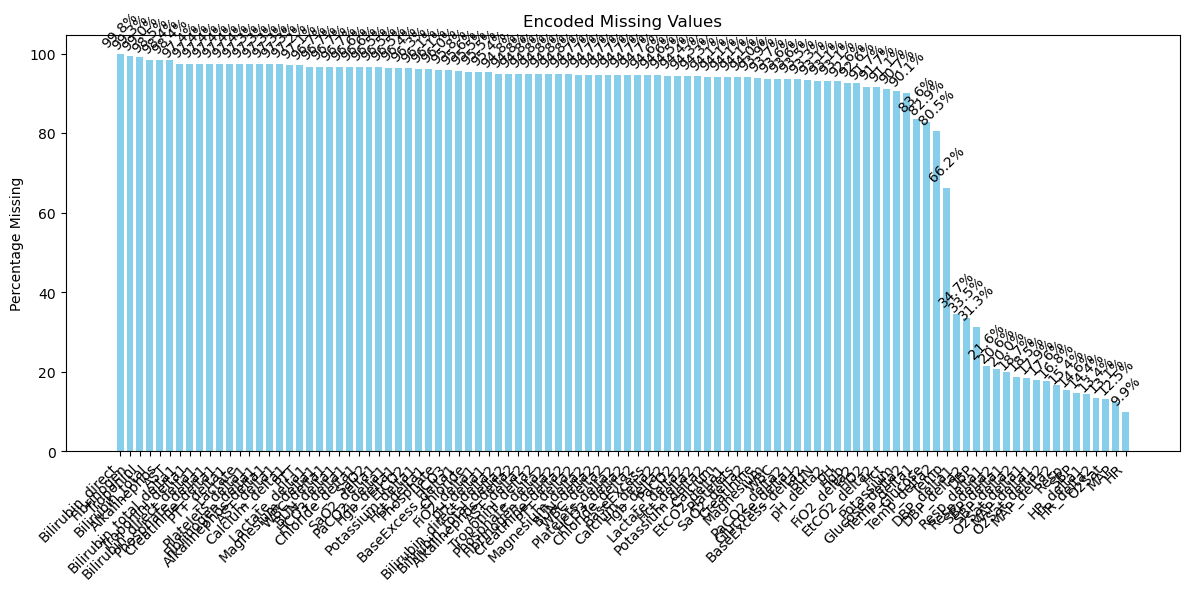

In [23]:
plot_missingness(encoded_df, title="Encoded Missing Values")

In [24]:
from models.mice.encode_data import impute_delta_features

imputed_df = impute_delta_features(encoded_df)

[IterativeImputer] Completing matrix with shape (1552210, 68)
[IterativeImputer] Ending imputation round 1/10, elapsed time 92.28
[IterativeImputer] Change: 165082.4433113448, scaled tolerance: 1.696 
[IterativeImputer] Ending imputation round 2/10, elapsed time 222.20
[IterativeImputer] Change: 580.4441141102149, scaled tolerance: 1.696 
[IterativeImputer] Ending imputation round 3/10, elapsed time 351.54
[IterativeImputer] Change: 1388.26919502187, scaled tolerance: 1.696 
[IterativeImputer] Ending imputation round 4/10, elapsed time 485.21
[IterativeImputer] Change: 42034.29829534783, scaled tolerance: 1.696 
[IterativeImputer] Ending imputation round 5/10, elapsed time 601.19
[IterativeImputer] Change: 58841.87855176823, scaled tolerance: 1.696 
[IterativeImputer] Ending imputation round 6/10, elapsed time 728.88
[IterativeImputer] Change: 39738.36006746761, scaled tolerance: 1.696 
[IterativeImputer] Ending imputation round 7/10, elapsed time 875.96
[IterativeImputer] Change: 6498

/Users/lukeedwards/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
# imputed_df.head(10)
imputed_df.head(10)
# plot_missingness(imputed_df, title="Imputed Missing Values")

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel,patient_id,SepsisLabel_delta,HR_delta1,HR_delta2,O2Sat_delta1,O2Sat_delta2,Temp_delta1,Temp_delta2,SBP_delta1,SBP_delta2,MAP_delta1,MAP_delta2,DBP_delta1,DBP_delta2,Resp_delta1,Resp_delta2,EtCO2_delta1,EtCO2_delta2,BaseExcess_delta1,BaseExcess_delta2,HCO3_delta1,HCO3_delta2,FiO2_delta1,FiO2_delta2,pH_delta1,pH_delta2,PaCO2_delta1,PaCO2_delta2,SaO2_delta1,SaO2_delta2,AST_delta1,AST_delta2,BUN_delta1,BUN_delta2,Alkalinephos_delta1,Alkalinephos_delta2,Calcium_delta1,Calcium_delta2,Chloride_delta1,Chloride_delta2,Creatinine_delta1,Creatinine_delta2,Bilirubin_direct_delta1,Bilirubin_direct_delta2,Glucose_delta1,Glucose_delta2,Lactate_delta1,Lactate_delta2,Magnesium_delta1,Magnesium_delta2,Phosphate_delta1,Phosphate_delta2,Potassium_delta1,Potassium_delta2,Bilirubin_total_delta1,Bilirubin_total_delta2,TroponinI_delta1,TroponinI_delta2,Hct_delta1,Hct_delta2,Hgb_delta1,Hgb_delta2,PTT_delta1,PTT_delta2,WBC_delta1,WBC_delta2,Fibrinogen_delta1,Fibrinogen_delta2,Platelets_delta1,Platelets_delta2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,018469,-330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,101922,-330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,101922,-329,0.022002,0.000000,0.005811,0.000000,-0.003376,0.000000,-0.078229,0.000000,-0.084194,0.000000,-0.039300,0.000000,0.004590,0.000000,-0.003153,0.000000,-0.003093,0.000000,-0.002640,0.000000,-0.033215,0.000000,0.002193,0.000000,-0.179913,0.000000,0.019489,0.000000,0.043129,0.000000,0.004893,0.000000,0.007577,0.000000,-0.028996,0.000000,0.007329,0.000000,-0.001338,0.000000,0.000061,0.000000,-1.184030,0.000000,0.000053,0.000000,0.000106,0.000000,0.000503,0.000000,-0.006774,0.000000,-0.000283,0.000000,0.000075,0.000000,0.024289,0.000000,0.012502,0.000000,-0.116790,0.000000,0.019582,0.000000,0.097915,0.000000,0.097025,0.000000
3,91.0,100.0,36.78,93.0,52.5,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,018469,-329,0.022002,0.000000,0.005811,0.000000,-0.003376,0.000000,-0.078229,0.000000,-0.084194,0.000000,-0.039300,0.000000,0.004590,0.000000,-0.003153,0.000000,-0.003093,0.000000,-0.002640,0.000000,-0.033215,0.000000,0.002193,0.000000,-0.179913,0.000000,0.019489,0.000000,0.043129,0.00

In [26]:
from models.mice.encode_data import split_and_restructure

imputed_df.head(10)
imputed_dict = split_and_restructure(imputed_df)

Rebuild Dictionary: 100%|███████████████| 40336/40336 [00:16<00:00, 2448.55it/s]


Average missingness: 25.95%


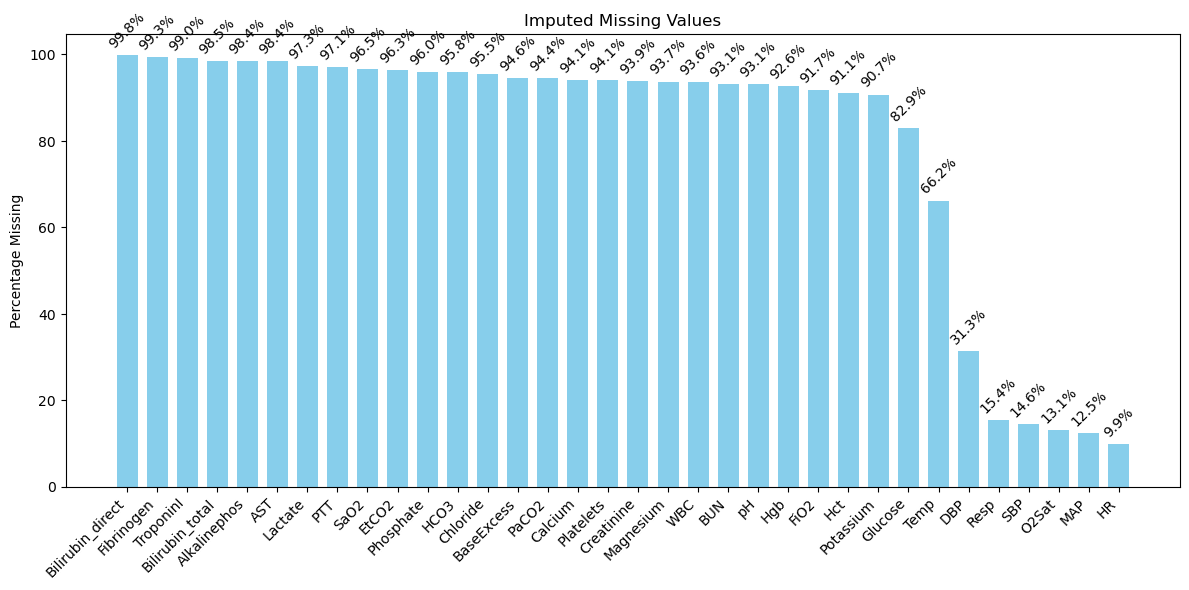

In [27]:
plot_missingness(imputed_df, title="Imputed Missing Values")

In [28]:
all_data["EtCO2"].describe()

count    57636.000000
mean        32.957657
std          7.951662
min         10.000000
25%         28.000000
50%         33.000000
75%         38.000000
max        100.000000
Name: EtCO2, dtype: float64

In [29]:
temp = []
for df in imputed_dict.values():
    temp = df
    break
temp.head(100)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel,SepsisLabel_delta,HR_delta1,HR_delta2,O2Sat_delta1,O2Sat_delta2,Temp_delta1,Temp_delta2,SBP_delta1,SBP_delta2,MAP_delta1,MAP_delta2,DBP_delta1,DBP_delta2,Resp_delta1,Resp_delta2,EtCO2_delta1,EtCO2_delta2,BaseExcess_delta1,BaseExcess_delta2,HCO3_delta1,HCO3_delta2,FiO2_delta1,FiO2_delta2,pH_delta1,pH_delta2,PaCO2_delta1,PaCO2_delta2,SaO2_delta1,SaO2_delta2,AST_delta1,AST_delta2,BUN_delta1,BUN_delta2,Alkalinephos_delta1,Alkalinephos_delta2,Calcium_delta1,Calcium_delta2,Chloride_delta1,Chloride_delta2,Creatinine_delta1,Creatinine_delta2,Bilirubin_direct_delta1,Bilirubin_direct_delta2,Glucose_delta1,Glucose_delta2,Lactate_delta1,Lactate_delta2,Magnesium_delta1,Magnesium_delta2,Phosphate_delta1,Phosphate_delta2,Potassium_delta1,Potassium_delta2,Bilirubin_total_delta1,Bilirubin_total_delta2,TroponinI_delta1,TroponinI_delta2,Hct_delta1,Hct_delta2,Hgb_delta1,Hgb_delta2,PTT_delta1,PTT_delta2,WBC_delta1,WBC_delta2,Fibrinogen_delta1,Fibrinogen_delta2,Platelets_delta1,Platelets_delta2
0,86.0,93.0,NaN,87.0,44.00,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-250,1.000000,5.000000,-7.000000,-6.000000,0.043972,0.125245,-16.000000,-12.000000,-4.000000,-7.000000,-1.819540,-2.942349,-4.000000,5.000000,0.066328,-0.261130,-0.006736,-0.172694,-0.002692,-0.001088,-0.014804,-0.024224,0.000493,0.000918,-0.209458,-0.401699,0.116327,-0.026215,0.082328,-0.031127,0.004562,0.027607,0.010907,0.000848,-0.032784,-0.371734,0.012711,0.097838,-0.001408,-0.006119,-0.000041,-0.001637,-0.601476,-0.352898,0.001160,0.071051,0.000475,-0.028836,-0.012803,-0.009452,0.004759,0.046732,-0.000106,0.000033,0.000152,0.093565,0.048770,-0.075438,0.022006,0.006842,-0.120589,0.711859,0.104266,-0.060451,0.088166,1.201873,0.548743,3.907128
1,112.0,89.0,NaN,157.0,123.67,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-250,6.000000,10.000000,-2.000000,1.000000,0.018447,0.048871,20.000000,11.000000,48.000000,33.000000,22.094605,5.288969,-5.000000,-7.000000,0.082757,0.824588,-0.002017,0.198831,-0.002784,0.048284,-0.023640,0.005459,-0.000696,0.000097,-0.260515,0.142222,-0.199913,-1.012553,0.084356,-0.026098,0.007013,0.156579,0.011540,0.004347,-0.039505,-0.625293,0.011678,0.080356,-0.001493,0.012571,0.000005,-0.003269,-1.207106,-2.319613,-0.001289,-0.176071,0.001156,-0.013208,0.000615,0.008667,0.002330,-0.093231,-0.000040,0.000214,0.000157,-0.236443,0.008644,0.390681,0.024683,0.168715,-0.101201,-0.448283,0.024039,-0.175225,0.141723,5.623890,-1.091800,1.277063
2,106.0,91.0,NaN,137.0,75.67,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-250,4.000000,2.000000,3.000000,0.000000,0.043177,0.134513,-9.000000,-31.000000,-15.000000,-65.660000,-6.773564,-38.634914,-2.000000,-4.000000,0.037404,0.537338,-0.008783,-0.160707,-0.002685,-0.081330,-0.021546,-0.015891,-0.001023,-0.006600,-0.197882,0.028841,0.128109,-0.414869,0.089310,-0.002460,0.003795,-0.078536,0.012215,-0.002727,0.122977,0.586348,0.008538,0.402394,-0.001527,0.000680,0.000052,-0.003186,-1.132266,0.785310,0.007567,0.270446,0.000116,0.000909,-0.001260,-0.002775,-0.002498,-0.167723,0.000090,-0.000065,0.000151,-0.027628,-0.004843,-0.919492,0.001984,-0.411262,-0.124620,-0.552662,-0.007965,0.003733,-0.007480,6.666698,1.149872,-2.288772
3,102.0,88.0,36.50,146.0,90.67,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-250,-2.000000,-5.000000,-3.000000,-2.000000,0.026524,0.021467,-22.000000,-10.000000,-50.660000,-6.000000,-23.134120,14.089866,-2.000000,1.000000,0.056383,-0.474138,-0.008209,0.042377,-0.003782,0.

In [30]:
from models.mice.encode_data import reconstruct_vitals
from tqdm import tqdm

reconstructed_impute_dict = {}

for patient_id, df in tqdm(imputed_dict.items(), desc='reconstructing'):
    reconstructed_df = reconstruct_vitals(df.copy(), max_iter=50)
    reconstructed_impute_dict[patient_id] = reconstructed_df

reconstructing: 100%|█████████████████████| 40336/40336 [13:00<00:00, 51.65it/s]


In [31]:
from models.lgbm_impl import train_and_evaluate_lgbm
print("Starting")
result = train_and_evaluate_lgbm(reconstructed_impute_dict, window=6)

# Access the results
print("Accuracy:", result["accuracy"])
print("\nClassification Report:\n", result["classification_report"])

Starting


Creating Windows: 100%|█████████████████| 40336/40336 [2:49:39<00:00,  3.96it/s]


TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'verbose'

In [ ]:
patient_record = None
for df in reconstructed_impute_dict.values():
    patient_record = df
    break
patient_record.head(100)